# 2장 머신러닝 프로젝트 처음부터 끝까지

#### * 진행할 주요단계

1. 큰그림 보기
2. 데이터 구하기
3. 데이터로부터 인사이트를 얻기 위해 탐색, 시각화
4. 머신러닝 알고리즘을 위해 데이터 준비
5. 모델을 선택하고 훈련
6. 모델을 상세하게 조정
7. 솔루션 제시
8. 시스템을 론칭하고 모니터링, 유지 보수

### California housing data

#### 1. 문제정의
모델만들기가 비즈니스 목적은 아니다.. 회사에서는 이 모델을 사용해서 어떻게 이익을 얻을려고 할까 이는 문제를 어떻게 구성할지 어떤 알고리즘을 선택할지 모델 평가에 어떤 성능지표를 사용할지 모델튜닝을 위해 얼마나 노력을 투여할지 결정한다.

California housing data는 레이블된 훈련 샘플이 있으니 전형적인 지도학습이다.  
또한 값을 예측해야하므로 전형적인 회귀문제이다.  
좀 더 구체적으로는 feature가 여러개이므로 다변량 회귀문제이다.

#### 2. 성능 측정 지표 선택

회귀문제에서는 RMSE가 일반적으로 사용되는 성능 측정 방법이지만 경우에 따라 다른 함수를 사용할 수도 있다.  
예를 들면 이상치로 보이는 구역이 많으면 MAE(평균 절대 오차)를 고려해볼 수도 있다.  
RMSE가 MAE에 비해 이상치에더 민감하다.  
이상치가 드물다면 RMSE가 잘 맞아 일반적으로 많이 사용된다.  

#### 3.가정 검사
예를들면 데이터의 target은 회귀문제인데 비즈니스 문제에서 필요한 output이 분류문제인 경우가 있다.  
본격적인 분석에 앞서 위와 같은 가정들을 잘 검사할 필요가 있다

### 데이터 다운로드

In [1]:
import os
import tarfile

from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/" ##데이터 다운로드 받을 곳의 주소 root
HOUSING_PATH = os.path.join("datasets", "housing") ##저장경로
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" ## root + 다운로드파일 경로

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path): ##내 os에 housing_path 경로 유무 검사
        os.makedirs(housing_path) ## 만약 없다면 다음과같은 경로를 만들어줌
    tgz_path = os.path.join(housing_path, "housing_tgz") ##경로 + housing_tgz
    urllib.request.urlretrieve(housing_url, tgz_path) ## url경로 + 경로 + housing_tgz 다운로드
    housing_tgz = tarfile.open(tgz_path) #tarfile.open은 tgz압축파일을 open
    housing_tgz.extractall(path=housing_path) # os 경로에 압축해제
    housing_tgz.close() #압축파일 close
fetch_housing_data() #함수호출

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv") #housing_path + housing.csv 새경로 생성 및 csv_path에 할당
    return pd.read_csv(csv_path) #해당 path를 pandas로 읽어들임

### 데이터 훑어보기

In [3]:
housing = load_housing_data()
housing.head() #위 다섯개 데이터

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info() # 데이터에 대한 요약정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.ocean_proximity.value_counts() ##범주형 변수임을 확인

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe() #수치형 변수들에 대해서만 요약 정보

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


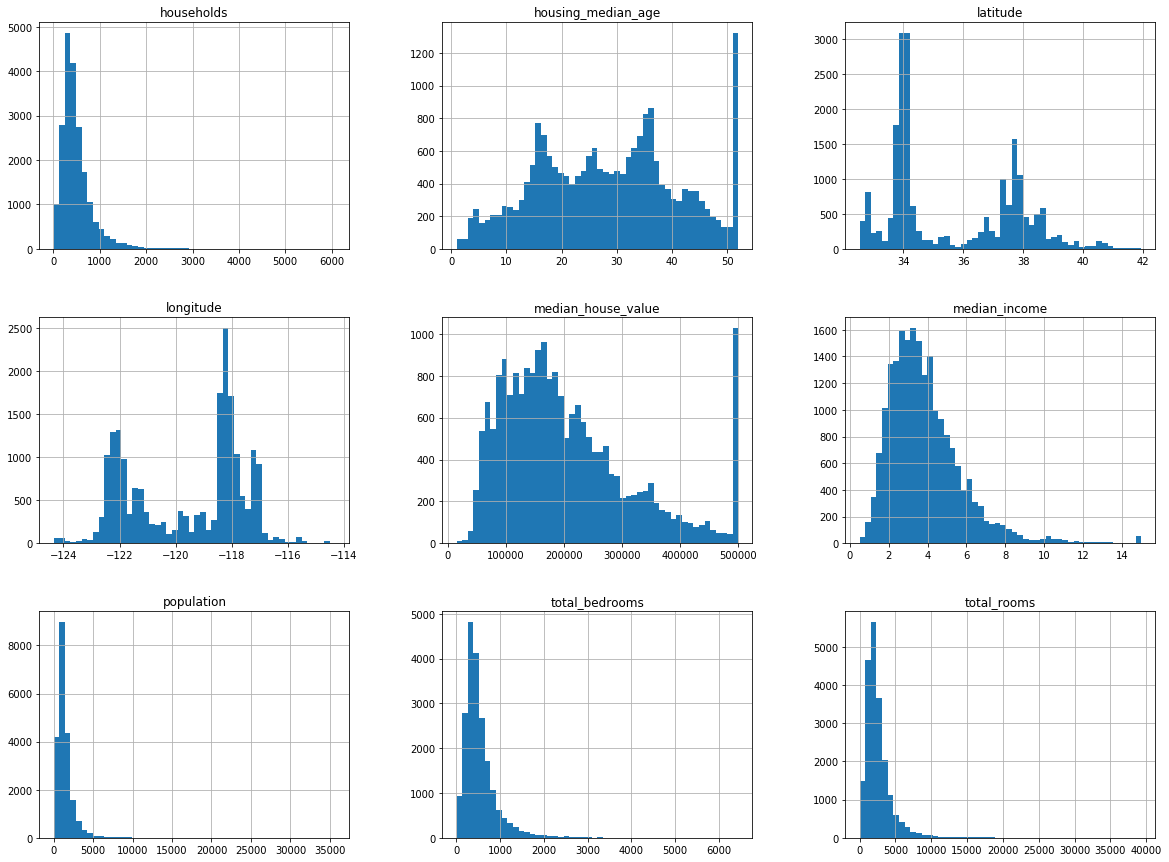

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

#### 히스토그램을 통한 데이터 파악
- median income은 US달러로 표시되어 있는것 같지않다. 실제로는 0.5~15사이로 스케일링한 데이터이다.  
- hosing median age와 median_house_value 도 마찬가지로 최대값과 최소값을 한정하였다. 특히 median_house_value는 target이 될 값이므로 문제점이 생길수있다(머신러닝 알고리즘이 한계값을 넘지않도록 학습할 수 도 있음) 이는 클라이언트와 논의해야할 사항이며 정확한 예측이 필요하다면 a. 한곗값 밖의 구역에 대한 정확한 레이블을 구하거나 b. 훈련세트에서 이러한 구역들을 제거한다)
- 특성들의 스케일링 단위가 많이 다르다
- 히스토그램의 꼬리가 두껍다 이런 형태는 일부 머신러닝 알고리즘에서 패턴을 찾기 힘들게한다. 좀 더 종모양의 분포를 가지도록 스케일링 해주도록하자.

### 테스트 세트 만들기
그냥 처음부터 테스트 세트 빼놓고 들여다보지도 말 것!  -> 데이터 스누핑 편항 일어날 수 있음

In [8]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


numpy로 작성한 split_train_test 함수는 겉보기에는 별 문제 없어보이지만 문제점을 가지고있다.  
프로그램을 다시 실행하면 다른 테스트 셋이 만들어진다.  
이에 대한 해결책으로
1. 처음 실행에서 테스트 세트를 저장하고 다음 실행에서 이를 불러들이는 방법 
2. np.random.permutation()을 호출하기 전에 난수 발생기의 초깃값을 지정하는 방법(예를들면, np.random.seed(42))


사이킷런 에서는 데이터셋을 여러 서브셋으로 나누는 다양한 방법을 제공한다. 그냥 사이킷런 쓰면된다!

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

데이터셋의 크기가 충분히 크다면 (feature 수에 비해) 상관없지만 그렇지 않으면 샘플링 편향이 생길 수 있다. 이때 다양한 집단의 특성을 반영할 수 있는 계층적 샘플링(stratified sampling)을 이용해야한다.  
예를들어 median_income이 median_house_price를 예측하는데 매우 중요하다면 테스트 세트가 전체 데이터 셋에 있는 여러 소득 카테고리를 잘 대표해야만 한다. 중간소득(median_income)은 연속적인 숫자형 특성이므로 소득에 대한 카테고리 특성을 만들어야만 한다.  
다음 코드는 중간 소득(median_income)을 1.5로 나누고(소득 카테고리 수를 제한하기 위해), ceil함수를 사용하여 오림해서 소득 카테고리 특성을 만들고(이산적인 카테코리를 만들기위해), 5보다 큰 카테고리는 5로 합친다.

In [10]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] <5, 5.0, inplace = True)

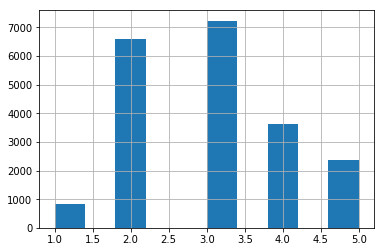

In [11]:
housing["income_cat"].hist()

이제 사이킷 런의 Stratified Shuffle Split을 사용하면된다.

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size =0.2 ,random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

그림 2-10을 참고하면 계층 샘플링과 무작위 샘플링의 샘플링 편향을 비교할 수 있다.  
계층 샘플링의 오류율이 무작위 샘플링에 비해 상당히 낮다는 것을 알 수 있다.

In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### 데이터 탐색과 시각화

이제 train set만을 다루어야함.  
탐색/시각화 할 때 데이터가 크다면 trainset을 또다시 샘플링 할 수 있으나 이경우 데이터가 그다지 크지않으므로 trainset으로 그대로진행

#### 지리적 데이터 시각화

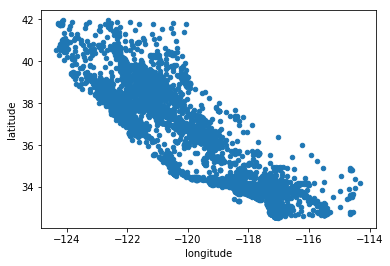

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude")

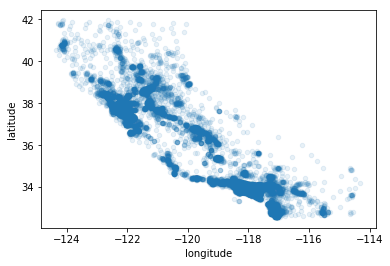

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1)
# 밀집된 지역을 확인하기위해 alpha = 0.1 옵션을 줌

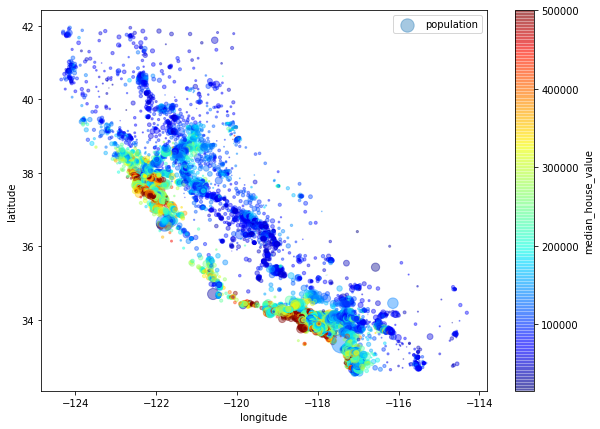

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.4,
            s = housing["population"]/100, label="population", figsize=(10,7), #s, 원의 반지름은 해당 지역의 인구를 나타냄
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False) # c, 색깔은 가격을 나타낸다. 파란색은 낮은가격 빨간색은 높은가격을 표시해주는 cmap=plt.get_cmap("jet")옵션을 이용한다.
plt.legend()

#### 상관관계 조사

`표준 상관계수`

In [18]:
corr_matrix = housing.corr()

In [19]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013A51E6C7B8>,
      dtype=object)

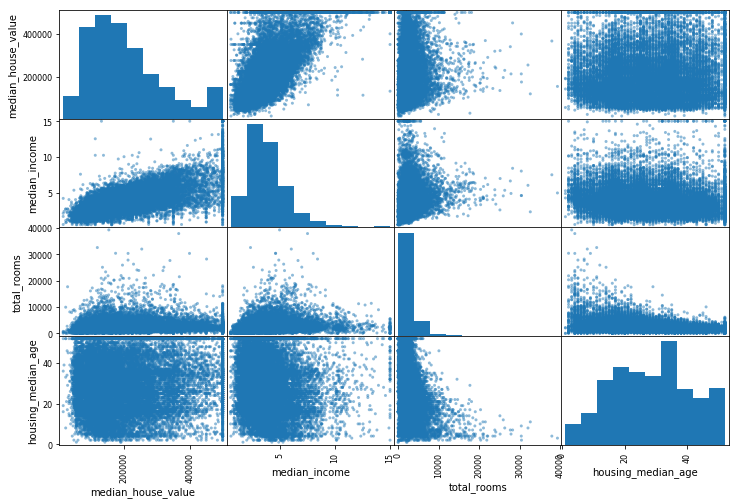

In [20]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

median_house_value를 예측하는데 median_income이 가장 유용할 것 같으므로 산점도를 확대해보자

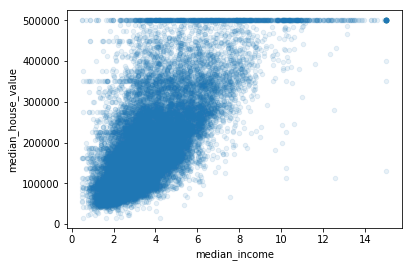

In [21]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

위 그래프의 특성
1. 양의 상관관계가 매우강함
2. 500000지점에서 수평으로 분포해있음
3. 450000, 350000 지점도 마찬가지로 수평적 분포가 보임

알고리즘이 데이터에서 이런 이상한 형태를 학습하지않도록 제거하는것이 좋아보인다

#### 특성조합으로 실험

In [22]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [23]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

### 머신러닝 알고리즘을 위한 데이터 준비

이 작업은 수동으로 하는 대신 함수를 만들어 자동화 해야하는 이유가 있다.
1. 어떤 데이터셋에 대해서도 데이터 변환을 손쉽게 반복할 수 있다.
2. 향후 프로젝트에 사용할 수 있는 변환 라이브러리를 점진적으로 구축할 수 있다.
3. 실제 시스템에서 알고리즘에 새 데이터를 주입하기 전에 변환시키는데 이 함수를 사용할 수 있다.
4. 여러가지 데이터 변환을 쉽게 시도해볼 수 있고 어떤 조합이 가장 좋은지 확인하는데 편리하다.


In [24]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#### 데이터 정제 

dropna()  
drop()  
fillna()  


In [25]:
housing.dropna(subset=["total_bedrooms"])
housing.drop("total_bedrooms",axis=1)
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace =True)

사이킷런의 SimpleImputer는 누락된 값을 손쉽게 다룰 수 있도록 해준다. 

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

중간값이 수치형 특성에서만 계산될 수 있기때문에 ocean_proximity를 제외한 복사본 생성

In [27]:
housing_num = housing.drop("ocean_proximity", axis = 1)
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [28]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [29]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [30]:
X = imputer.transform(housing_num)
type(X) ##imputer의 결과물은 평범한 numpy array이므로 pandas df로 돌려주자

numpy.ndarray

In [31]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index = list(housing.index.values))

In [32]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999


### *사이킷런의 설계 철학
#### 1. 일관성  
모든 객체가 일관되고 단순한 인터페이스를 공유한다.
- 추정기(estimator)  
데이터셋을 기반으로 일련의 모델 파라미터들을 추정하는 객체를 추정기라고 한다. 추정자체는 fit 메서드에 의해 수행되고 하나의 매개변수로 하나의 데이터셋만 전달한다.(지도학습의 경우에는 레이블을 포함한 두개의 매개변수)
- 변환기(transformer)  
변환은 transform() 메서드가 수행한다. 그리고 변환된 데이터셋을 반환한다. 모든 변환기는 fit()과 transform()을 연달아 호출하는것과 동일한 fit_transform() 메서드도 가지고있다 (fit_transform()이 최적화 되어있어 더 빠르다)
- 예측기(predictor)  
일부 추정기는 주어진 데이터셋에 대해 예측을 만들 수 있다. predict() 메서드는 새로운 데이터 셋을 받아 이에 상응하는 예측값을 반환한다. 또한 테스트 세트를 사용해 예측의 품질을 측정하는 score()메서드를 가지고있다.

#### 2. 검사 가능  
모든 추정기의 하이퍼파라미터는 공개 인스턴스 변수로 직접 접근할 수 있고. 모든 추정기의 학습된 모델 파라미터도 접미사로 밑줄을 붙여서 공개 인스턴스 변수로 제공된다.(imputer.statitics_)

#### 3. 클래스 남용 방지  
데이터셋을 별도의 클래스가 아니라 넘파이 배열이나 사이파이 희소행렬로 표현한다.

#### 4. 조합성  
기존의 구성요소를 최대한 재사용한다. 예를들어 여러 변환기를 연결한 다음 마지막에 추정기 하나를 배치한 Pipeline 추정기를 쉽게 만들 수 있다.

#### 5. 합리적인 기본값  
사이킷런은 일단 돌아가는 기본 시스템을 빠르게 만들 수 있도록 대부분 매개변수에 합리적인 기본값(default)를 지정해두었다.

### 텍스트와 범주형 특성 다루기

#### factorizing  
ocean_proximity 변수는 범주형 변수이므로 숫자로 범주화 시켜주자

In [33]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [34]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]


array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0], dtype=int64)

In [35]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

factorized 된 표현 방식의 문제는 머신러닝 알고리즘이 가까이 있는 두 값이 떨어져 있는 두 값보다 더 비슷하다고 생각한다는 점이다. 실제로는 그렇지않다 (순서형 범주에서 문제를 일으킴)  
그래서 `one-hot encoding` 방식을 사용한다.

In [36]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot
##출력형태가 numpy array가 아니라 scipy sparse matrix 형태이다. 변환해주자

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [37]:

housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

#### **나만의 변환기 만들기**

사이킷런이 유용한 변환기를 많이 제고하지만 나만의 변환기를 만들 필요가있다.  



In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

100% 확신이 없는 준비단계에서는 하이퍼파라미터를 추가해서 불확실성을 줄인다.  
이렇게 데이터 준비단계를 자동화할수록 더 많은 조합을 자동으로 시도해볼 수 있고 최상의 조합을 찾을 가능성을 높여준다.

### 특성스케일링(feature scaling)

- **min-max 스케일링**
데이터에서 최소값을 뺸훈 최댓값과 최솟값의 차이로 나누면 만들 수 있다.  
sklearn의 MinMaxScaler 변환기를 사용하면 되고 0~1 사이를 원하지않는다면 feature_range 매개변수로 범위를 변경할 수 도 있다.
- **표준화**
표준화는 평균을뺀후 표준편차로 나누어 평균이 0 분산이 1이 되게끔 만들어준다. 표준화는 범위에 상한과 하한이 없어 DNN같은 알고리즘에서는 문제가 될 수 있다. (신경망에서는 0~1 사이의 input을 추천함.)  
대신 표준화는 이상치의 영향을 적게 받을 수 있음.  
sklearn의 StandardScaler 변환기를 사용하면 됨.

**@Caution** 모든 변환기에서 스케일링은 전체 데이터가 아니고 훈련 데이터에 대해서만 fit()메서드를 적용해야한다. 그런 다음 훈련 세트와 테스트 세트에 대해 transform()메서드를 적용한다. 

### 변환 파이프라인

사이킷런에는 연속된 변환을 순서대로 처리할 수 있도록 도와주는 Pipeline 클래스가 있다.

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [40]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

DataFrameSelector는 나머지는 버리고 필요한 특성을 선택하여 데이터 프레임을 넘파이 배열 형태로 바꾸는 식으로 데이터를 변환한다.  
이를 이용하여 데이터프레임을 받아 수치형만 다루는 파이프라인을 쉽게 만들 수 있다.

In [42]:
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
]) ##숫자형 특성을 다루는 파이프라인

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder())
]) ##범주형 특성을 다루는 파이프라인
## CategoricalEncoder는 sklearn에서 없어진거같음. 책 내용상 CategoricalEncoder(encoding = Onehot-dense) 였으므로 아마  Onehotencoding을 생각한 듯 싶다.

이 두 파이프라인을 사이킷런의 FeatureUnion을 통해서 합칠 수 있다. 

In [43]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list = [
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [44]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared 

housing_prepared .shape

(16512, 16)

### 모델선택과 훈련

#### 훈련세트에서 훈련하고 평가하기

선형회귀모델을 훈련시켜보자

In [46]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("예측: ", lin_reg.predict(some_data_prepared))
print("레이블: ", list(some_labels))

예측:  [210644.60469668 317768.80664235 210956.43335529  59218.98894118
 189747.55853203]
레이블:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [48]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions) 
lin_rmse = np.sqrt(lin_mse)
lin_rmse #또는 mean_squared_error의 squared 옵션으로 mse / rmse를 구할 수 있다.

68628.19819848923

과소적합으로인해 rmse가 너무크다

DecisionTree model을 학습 시켜보자

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [50]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


과대적합으로 인해 rmse가 0으로나옴

#### 교차 검증을 사용한 평가

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_score = np.sqrt(-scores)

**Caution**  
사이킷런의 교차검증 기능은 scoring 매개변수에 비용함수가 아닌 효용함수를 기대한다. MSE는 낮을 수록 좋은 비용함수이므로 MSE의 음숫값을 계산하는 neg_mean_squared_error를 사용한다. 

In [52]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_score)

Scores: [69288.54959167 66592.23635513 70819.94721458 69458.95519463
 70645.20433476 74963.30726201 72738.99188913 69550.94359776
 76558.93063837 68844.08153919]
Mean: 70946.11476172248
Standard deviation: 2850.31367877747


교차검증으로 DecisionTree 모델을 사용하니 오히려 회귀보다도 더 안좋은 스코어를 기록!

In [53]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843548 66960.11769077 70347.95253867 74739.57051838
 68031.13387324 71193.84184206 64969.63059148 68281.61137967
 71552.91568337 67665.10086648]
Mean: 69052.46134196043
Standard deviation: 2731.6740307107216


확실히 결정트리 모델이 과적합 되어있었으므로 과소적합된 선형회귀모델보다도 안좋은 성능이 나옴

In [54]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=10)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
forest_rmse = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv = 10)
forest_rmse_scores = np.sqrt(-forest_rmse)
forest_rmse
display_scores(forest_rmse_scores)

Scores: [52453.67738459 50186.62153122 52246.62174758 54004.55937596
 52819.85411454 55889.77022781 52631.36091417 50307.84070628
 55538.89277843 52566.18211619]
Mean: 52864.538089677095
Standard deviation: 1789.072421477792


In [56]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions) 
forest_rmse = np.sqrt(forest_mse)
forest_rmse #또는 mean_squared_error의 squared 옵션으로 mse / rmse를 구할 수 있다.

22225.033376549087

훈련세트에 대한 점수가 검증세트에 대한 점수보다 훨씬 낮으므로 훈련 세트에 과적합 되어있다. 그래서 과적합을 피하기위해  
규제를 하거나, 더 많은 훈련데이터를 모으거나, 모델을 좀더 간단히 하는 방법이 있다.  
하지만 그전에 다양한 모델을 시도해볼 필요가있다.

**모델을 매번 학습시킬것 없이 파이썬의 pickle 패키지나 sklearn.externals.joblib 을 사용하여 사이킷런 모델을 간단하게 저장 가능하다.**
```python
sklearn.externals import joblib

joblib.dump(my_model, "my_model.pkl")

my_model_loaded = joblib.load("my_model.pkl")

```


### 모델 세부 튜닝

#### 그리드 탐색

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators' : [3, 10, 10], 'max_features' : [2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [58]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 10}

**Tip : 하이퍼파라미터가 설정한 값의 최대치로 결정 된경우에 다음 탐색 때 더 큰 수들을 정해서 하이퍼파라미터 탐색을 해주면 된다.** 

In [59]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

위와 같이 최적의 추정기에 직접 접근도 가능하다.

In [60]:
grid_search.cv_results_
#각 반복에대한 결과값을 가지고있는 딕셔너리

{'mean_fit_time': array([0.51464477, 1.65259013, 1.60531526, 0.71967583, 2.47400274,
        2.46841507, 1.00532746, 3.4007441 , 3.44918542, 1.28377452,
        4.3781075 , 4.27916451, 0.75617766, 2.50949063, 0.94686799,
        3.15897698, 1.13896146, 4.32081814]),
 'std_fit_time': array([0.03143269, 0.05147027, 0.02166943, 0.00580204, 0.05061845,
        0.03653802, 0.0137529 , 0.12181801, 0.10125423, 0.03611924,
        0.10503631, 0.02773012, 0.00662783, 0.01046581, 0.00870746,
        0.02650557, 0.01313254, 0.57658799]),
 'mean_score_time': array([0.00418735, 0.01056924, 0.00996561, 0.00359111, 0.01038418,
        0.01196775, 0.00378742, 0.01036482, 0.0101656 , 0.00358977,
        0.01037002, 0.00997238, 0.00438876, 0.0121675 , 0.00418935,
        0.01116896, 0.00478005, 0.01276183]),
 'std_score_time': array([1.16511706e-03, 1.19739075e-03, 1.48298656e-05, 4.88460948e-04,
        5.03921919e-04, 3.98941090e-03, 4.00292841e-04, 4.94807359e-04,
        3.85094486e-04, 4.90294034e-

In [61]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63556.856209249745 {'max_features': 2, 'n_estimators': 3}
55527.327764884205 {'max_features': 2, 'n_estimators': 10}
55680.677985465256 {'max_features': 2, 'n_estimators': 10}
60170.04350540825 {'max_features': 4, 'n_estimators': 3}
52699.27508148144 {'max_features': 4, 'n_estimators': 10}
52985.209537400166 {'max_features': 4, 'n_estimators': 10}
58411.15634542904 {'max_features': 6, 'n_estimators': 3}
51675.45972588802 {'max_features': 6, 'n_estimators': 10}
52256.482621121926 {'max_features': 6, 'n_estimators': 10}
58593.19054735425 {'max_features': 8, 'n_estimators': 3}
52181.21741123959 {'max_features': 8, 'n_estimators': 10}
51642.46429998484 {'max_features': 8, 'n_estimators': 10}
61619.8452930641 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54870.560589808825 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60121.80005760588 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53066.95749306552 {'bootstrap': False, 'max_features': 3, 'n_estimators

#### 랜덤 탐색

그리드 탐색 방법은 비교적 적은 수의 조합을 탐구할 떄 좋지만 하이퍼파라미터 탐색 공간이 커지면 RandomizedSearchCV를 사용하는 것이 좀 더 낫다.  
특히 규제처럼 설정값이 연속형인 경우 랜덤 탐색이 권장된다. 

#### 앙상블 방법
모델을 세밀하게 튜닝하는 또 다른 방법은 최상의 모델을 연결해보는 것이다. 모델의 그룹이 최상의 단일 모델보다 더 나은 성능을 발휘할 때가 많다.(예를들면, 랜덤포레스트와 디시젼트리)  
자세한건 7장에서

#### 최상의 모델과 오차 분석

In [134]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
#cat_encoder = full_pipeline.named_transformers_["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.39528093083430593, 'median_income'),
 (0.14276979094160436, 'INLAND'),
 (0.10363039199795512, 'pop_per_hhold'),
 (0.0848169650453154, 'bedrooms_per_room'),
 (0.0677248061062665, 'longitude'),
 (0.06277955912045916, 'latitude'),
 (0.044310455286576504, 'housing_median_age'),
 (0.029390871112549642, 'rooms_per_hhold'),
 (0.016599258551038422, 'population'),
 (0.016451580461241656, 'total_rooms'),
 (0.015492829454773756, 'households'),
 (0.013960079587475796, 'total_bedrooms'),
 (0.002483418564403132, '<1H OCEAN'),
 (0.0023635332895759987, 'NEAR OCEAN'),
 (0.001900113728020083, 'NEAR BAY'),
 (4.5415918438570976e-05, 'ISLAND')]

#### 테스트 세트로 시스템 평가하기

In [64]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [65]:
print("Test rmse : {:.1f}".format(final_rmse,))

Test rmse : 50587.2


*하이퍼파라미터 튜닝을 많이 했다면 교차검증을 사용해 측정한것보다 조금 성능이 낮은 것이 보통이다. 이런 경우가 생기더라도 억지로 하이퍼파라미터를 튜닝하려고 시도하면 안된다.*

### 연습문제

#### 1. 서포트 벡터 머신 회귀를 kernel="linear", kernel="rbf" 등의 다양한 하이퍼파라미터 설정으로 시도해보세요. 지금은 이 하이퍼파라미터가 무엇을 의미하는지 너무 신경쓸 필요없습니다. 최상의 SVR모델은 무엇인가요?

In [98]:
## 박해선님 깃허브 참고해서 코드를 가져왔지만 너무 많은 양의 그리드 서치이므로 조금 줄여주도록 하자.
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [100., 300., 1000.0],
         'gamma': [0.01, 0.1, 1.0]},
    ] ##grid search할 parameter정의

svm_reg = SVR() ##support vector regression 인스턴스화.
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           verbose=2, n_jobs=1) ##grid search 정의 {알고리즘 : svm_reg, 파릴미터 : param_grid, 폴드 수 : 5, 
                                                ##scroing 방법 : neg_mean_squared_error, verbose option, n jobs}

grid_search.fit(housing_prepared, housing_labels) #train set에 grid_search fitting

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=3000.0, kernel=linear .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................... C=3000.0, kernel=linear, total=  10.4s
[CV] C=3000.0, kernel=linear .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s


[CV] .......................... C=3000.0, kernel=linear, total=  10.3s
[CV] C=3000.0, kernel=linear .........................................
[CV] .......................... C=3000.0, kernel=linear, total=  11.7s
[CV] C=3000.0, kernel=linear .........................................
[CV] .......................... C=3000.0, kernel=linear, total=  11.3s
[CV] C=3000.0, kernel=linear .........................................
[CV] .......................... C=3000.0, kernel=linear, total=  11.0s
[CV] C=10000.0, kernel=linear ........................................
[CV] ......................... C=10000.0, kernel=linear, total=  13.5s
[CV] C=10000.0, kernel=linear ........................................
[CV] ......................... C=10000.0, kernel=linear, total=  13.1s
[CV] C=10000.0, kernel=linear ........................................
[CV] ......................... C=10000.0, kernel=linear, total=  13.0s
[CV] C=10000.0, kernel=linear ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 12.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=1,
             param_grid=[{'C': [3000.0, 10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.1, 1.0], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

*최상 모델의 5폴드 평가 점수는 아래와 같음*

In [99]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70363.84006944533

In [100]:
grid_search.best_params_
#최상의 하이퍼파라미터

{'C': 30000.0, 'kernel': 'linear'}

*RandomForest 보다도 성능이 안나오고, linear이 rbf 커널보다 좋은 성능을 보이고있음. 게다가 C값이 maximum 에서 잡혔으므로 더 높여줄 필요도 있음*

#### 2. GridSearchCV를 RandomizedSearchCV로 바꿔보세요

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

#https://docs.scipy.org/doc/scipy/reference/stats.html
#expon() reciprocal() 외의 다양한 통계적 함수들.

# kernel 매개변수가 linear 일떄는 gamma가 알아서 무시됨.

param_distribs = {
    'kernel' : ['linear', 'rbf'],
    'C' : reciprocal(20, 200000),
    'gamma' : expon(scale= 1.0), ##통계적 함수를 쓰는 이유는 뒤에 다시 설명
}

svm_reg = SVR() #support vector Regressor 인스턴스화
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter = 10, #git에는 50으로 줬지만 나는 10만 준다.
                                cv = 5,
                                scoring = "neg_mean_squared_error",
                                verbose=2,
                                n_jobs = 1,
                                random_state = 42) # Define Random search
rnd_search.fit(housing_prepared, housing_labels) #Random search fitting

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=  10.9s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.8s remaining:    0.0s


[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=  10.6s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=  10.3s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=  10.3s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   9.9s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=  14.9s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=  15.6s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=  15.0s
[CV] C=26290.2

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 11.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000175E9AA8688>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000175D7D51988>,
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

*최상 모델의 5-folds 점수는 아래와 같음*

In [104]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54767.960710084146

In [105]:
rnd_search.best_params_
#랜덤서치 상 최고의 파라미터

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

**보통 랜덤서치가 같은 시간안에 그리드 서치보다 더 좋은 하이퍼파리미터를 찾는다**

gamma를 랜덤 서치할때 사용된 scale = 1.0 지수분포를 살펴보자.  
일부 샘플을 1.0보다 아주 크거나 작지만 대부분의 값이 0.1과 7.4에 집중되어 있음을 알 수 있다.

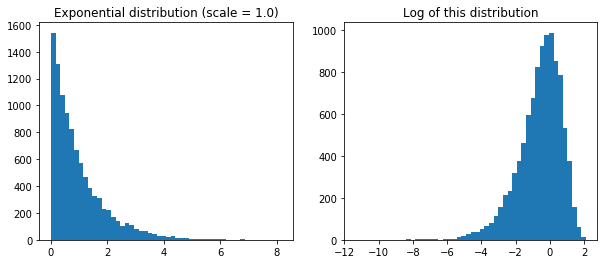

In [111]:
expon_distrib = expon(scale = 1.) ##exponential 함수 정의
samples = expon_distrib.rvs(10000, random_state=42) #샘플 10000개 생성
plt.figure(figsize=(10,4)) #figure size 정의
plt.subplot(121)
plt.title("Exponential distribution (scale = 1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

파라미터 C에 사용된 분포는 이와 다르다. 주어진 범위안에서 균등 분포로 샘플링 된다. 그래서 오른쪽 로그 분포가 거의 일정하게 나타난다.  
**이런 분포는 원하는 스케일이 정확히 무엇인지 모를 때 사용하면 좋다!!**

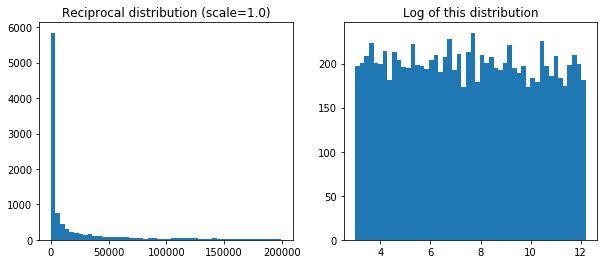

In [112]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state = 42)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

*reiprocal() 함수는 **하이퍼파라미터스케일에 대해 전혀 감을 잡을 수 없을 때** 사용합니다.*  
*오른쪽 그래프를 보면 알 수 있듯이 주어진 범위안에서 모든 값이 균등합니다*  
*반면 **지수분포는 하이퍼파라미터의 스케일을 어느정도 알고 있을 때** 사용하는 것이 좋습니다.*

#### 3. 가장 중요한 특성을 선택하는 변환기를 준비 파이프라인에 추가해보세요

In [113]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

이 특성 선택 클래스(TopFeatureSelector)는 어떤 식으로든 특성 중요도를 계산했다고 가정합니다.  TopFeatureSelector의 fit()메서드에서 직접 계산할 수도 있지만 이렇게하면 그래드 서치나 랜덤 서치 모든 하이퍼 파라미터에 조합에 대해 계산이 일어나기 떄문에 매우 느려집니다.

선택할 특성의 개수 지정

최상의 k개 특성의 인덱스를 확인해 보겠습니다.

In [121]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices #top k개의 특성 중요도의 index 추출

array([ 0,  7,  9, 10, 12], dtype=int64)

In [135]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'pop_per_hhold', 'bedrooms_per_room',
       'INLAND'], dtype='<U18')

In [136]:
sorted(zip(feature_importances, attributes), reverse = True)[:k]

[(0.39528093083430593, 'median_income'),
 (0.14276979094160436, 'INLAND'),
 (0.10363039199795512, 'pop_per_hhold'),
 (0.0848169650453154, 'bedrooms_per_room'),
 (0.0677248061062665, 'longitude')]

이제 이전에 정의한 준비 파이프라인과 특성 선택기를 추가한 새로운 파이프라인을 만들어보자

In [137]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [138]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

처음 세개 샘플의 특성을 확인해보자

In [142]:
housing_prepared_top_k_features[0:3].toarray()

array([[-1.15604281, -0.61493744, -0.08649871,  0.15531753,  0.        ],
       [-1.17602483,  1.33645936, -0.03353391, -0.83628902,  0.        ],
       [ 1.18684903, -0.5320456 , -0.09240499,  0.4222004 ,  0.        ]])

최상의 k개 특성이 맞는지 다시확인해보자

In [144]:
housing_prepared[0:3, top_k_feature_indices].toarray()

array([[-1.15604281, -0.61493744, -0.08649871,  0.15531753,  0.        ],
       [-1.17602483,  1.33645936, -0.03353391, -0.83628902,  0.        ],
       [ 1.18684903, -0.5320456 , -0.09240499,  0.4222004 ,  0.        ]])

#### 4. 전체 데이터 준비 과정과 최종 예측을 하나의 파이프라인으로 만들어보세요.

In [148]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [149]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(memory=None,
         steps=[('preparation',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('num_pipeline',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  DataFrameSelector(attribute_names=['longitude',
                                                                                                     'latitude',
                                                                                                     'housing_median_age',
                                                                                                     'total_rooms',
                                                                                                     'total_bedrooms',
                                                                                                     'po

몇개의 샘플에 전체 파이프라인을 적용해보자

In [150]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("예측:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("레이블:\t\t", list(some_labels))

예측:	 [185384.13066634 341000.56131537 172531.39955817  56040.55006167]
레이블:		 [286600.0, 340600.0, 196900.0, 46300.0]


#### 5. GridSearchCV를 사용해 준비 단계의 옵션을 자동으로 탐색해보세요.

In [151]:
param_grid = [
        {'preparation__num_pipeline__imputer__strategy': ['mean', 'median', 'most_frequent'],
         'feature_selection__k': list(range(1, len(feature_importances) + 1))}
]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=1)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean, total=   6.8s
[CV] feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


[CV]  feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean, total=   6.8s
[CV] feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean, total=   6.9s
[CV] feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean, total=   6.3s
[CV] feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean, total=   6.6s
[CV] feature_selection__k=1, preparation__num_pipeline__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num_pipeline__imputer__strategy=median, total=   6.8s
[CV] feature_selection__k=1, preparation__num_pipeline__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num_pipeline__imputer__strategy=median, total=   6.5s
[CV] feature_selection

KeyboardInterrupt: 

In [ ]:
grid_search_prep.best_params_

In [ ]:
StratifiedShuffleSplit()

In [218]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

In [ ]:
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]

In [216]:
next(split.split(housing, housing["income_cat"]))[0].shape, next(split.split(housing, housing["income_cat"]))[1].shape

((13209,), (3303,))